In [1]:
import pandas as pd
data=pd.read_csv('21stJun22_Plastic_Data.csv')
dataset = data
dataset

,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,922.78,927.23,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel
0,56.59,45.55,41.02,32.43,30.62,27.92,30.03,27.16,25.30,25.78,...,31.66,30.13,28.94,29.52,31.30,33.66,35.51,36.76,37.22,hdpe
1,65.88,58.97,58.88,53.22,55.89,57.67,58.82,56.37,56.90,57.04,...,55.13,52.46,50.55,51.68,54.58,57.63,59.59,61.19,61.65,hdpe
2,67.52,61.49,60.17,55.99,58.40,61.14,61.49,58.62,59.78,59.77,...,56.89,54.10,52.26,53.55,56.66,59.68,61.85,63.33,63.89,hdpe
3,70.14,61.52,61.86,57.40,60.73,62.62,62.99,60.33,60.94,61.00,...,57.52,54.64,52.96,54.23,57.62,60.59,62.72,64.41,65.07,hdpe
4,69.60,60.57,60.95,57.18,59.47,62.03,61.94,59.28,60.21,60.82,...,57.00,54.04,52.32,53.66,56.93,60.16,62.00,63.67,64.63,hdpe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,45.28,33.73,25.64,19.95,17.27,14.32,14.05,13.29,12.27,11.79,...,72.31,71.53,71.58,71.50,72.29,72.50,72.91,73.07,73.12,ldpe
850,79.05,55.45,48.17,41.09,39.89,35.32,33.08,33.46,30.93,31.09,...,51.93,50.00,49.24,50.31,53.01,55.31,56.54,57.57,57.99,ldpe
851,92.42,71.80,58.17,49.34,49.38,44.87,43.02,42.41,42.62,44.40,...,64.78,61.79,59.92,60.59,63.92,67.15,69.53,71.14,72.27,ldpe
852,89.35,65.97,63.94,54.21,52.94,50.90,52.32,50.60,52.52,55.75,...,72.02,71.89,71.14,71.24,71.62,71.78,71.69,72.00,72.20,ldpe


In [2]:
#check the shape of data
dataset.shape

(854, 123)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 15 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 15 records were not available at the time when the machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (769, 123)
Unseen Data For Predictions: (85, 123)


# 6.0 Setting up the Environment in PyCaret

In [4]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'originalLabel', session_id=123, log_experiment = True) 

,Description,Value
0,session_id,123
1,Target,originalLabel
2,Target Type,Multiclass
3,Label Encoded,"hdpe: 0, ldpe: 1, pp: 2"
4,Original Data,"(769, 123)"
5,Missing Values,False
6,Numeric Features,122
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9462,0.9881,0.9475,0.9509,0.9461,0.9192,0.9216,0.0030
et,Extra Trees Classifier,0.9052,0.9840,0.9042,0.9105,0.9051,0.8574,0.8600,0.0370
knn,K Neighbors Classifier,0.9033,0.9771,0.9023,0.9071,0.9035,0.8546,0.8562,0.1420
lr,Logistic Regression,0.9032,0.9813,0.9031,0.9094,0.9035,0.8547,0.8574,0.3050
rf,Random Forest Classifier,0.8997,0.9805,0.8997,0.9036,0.8993,0.8493,0.8515,0.0400
gbc,Gradient Boosting Classifier,0.8940,0.9716,0.8940,0.9021,0.8942,0.8407,0.8445,0.0510
lightgbm,Light Gradient Boosting Machine,0.8922,0.9804,0.8917,0.8975,0.8919,0.8380,0.8408,0.0180
dt,Decision Tree Classifier,0.8624,0.8973,0.8628,0.8689,0.8618,0.7934,0.7969,0.1410
lda,Linear Discriminant Analysis,0.7900,0.9569,0.7940,0.8214,0.7864,0.6860,0.7006,0.0040
ridge,Ridge Classifier,0.7807,0.0000,0.7836,0.8122,0.7773,0.6717,0.6864,0.0040


# 8.0 Create a Model

### 8.1 Decision Tree Classifier

In [6]:
the_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9959,0.9298,0.9407,0.9257,0.8892,0.8966
1,0.9444,0.9975,0.9474,0.9532,0.9455,0.9168,0.9201
2,0.9630,0.9857,0.9649,0.9650,0.9625,0.9444,0.9458
3,0.9630,0.9949,0.9649,0.9641,0.9630,0.9444,0.9448
4,0.9444,0.9761,0.9441,0.9443,0.9439,0.9164,0.9169
5,0.8889,0.9606,0.8849,0.8897,0.8889,0.8328,0.8332
6,0.9444,0.9980,0.9441,0.9456,0.9445,0.9165,0.9170
7,0.9630,0.9930,0.9649,0.9671,0.9630,0.9444,0.9464
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [7]:
#trained model object is stored in the variable 'dt'. 
print(the_model)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


# 9.0 Tune a Model

In [8]:
the_model = tune_model(the_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9074,0.9959,0.9123,0.9295,0.9066,0.8618,0.8729
1,0.9444,0.9960,0.9474,0.9532,0.9455,0.9168,0.9201
2,0.9630,0.9878,0.9649,0.9650,0.9625,0.9444,0.9458
3,0.9444,0.9969,0.9474,0.9532,0.9455,0.9168,0.9201
4,0.9074,0.9848,0.9090,0.9075,0.9070,0.8609,0.8613
5,0.8519,0.9571,0.8465,0.8516,0.8513,0.7771,0.7775
6,0.9444,0.9924,0.9441,0.9466,0.9450,0.9165,0.9170
7,0.9444,0.9924,0.9441,0.9456,0.9445,0.9165,0.9170
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [9]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(the_model)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.1 Confusion Matrix

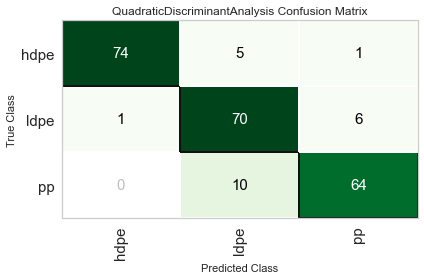

In [10]:
plot_model(the_model, plot = 'confusion_matrix')

### 10.2 Classification Report

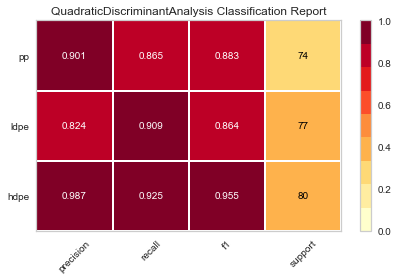

In [11]:
plot_model(the_model, plot = 'class_report')

### 10.3 Decision Boundary Plot

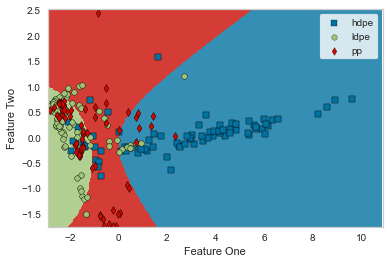

In [12]:
plot_model(the_model, plot='boundary')

### 10.4 Prediction Error Plot

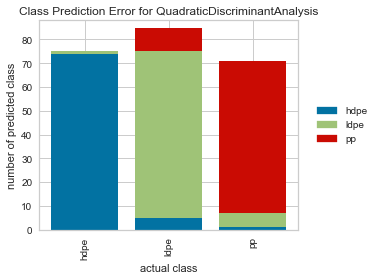

In [13]:
plot_model(the_model, plot = 'error')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [14]:
evaluate_model(the_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (41 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_knn` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [15]:
predict_model(the_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9004,0.9826,0.8997,0.9050,0.9015,0.8506,0.8518


# 12.0 Finalize Model for Deployment

In [16]:
the_model = finalize_model(the_model)

In [17]:
print(the_model)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (15 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [18]:
unseen_predictions = predict_model(the_model, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0000,0.9860,0,0,0,0,0


,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel,Label,Score
0,70.14,61.52,61.86,57.40,60.73,62.62,62.99,60.33,60.94,61.00,...,52.96,54.23,57.62,60.59,62.72,64.41,65.07,hdpe,hdpe,1.0000
1,72.06,61.77,60.82,57.37,60.47,62.92,61.93,59.81,60.95,60.79,...,52.57,53.89,57.43,60.61,62.48,64.09,64.88,hdpe,hdpe,1.0000
2,47.23,37.06,31.53,26.90,25.43,26.42,28.65,24.42,23.27,24.01,...,26.24,27.03,29.24,31.62,33.38,34.51,35.06,hdpe,hdpe,0.9387
3,80.50,75.22,78.10,73.49,78.53,78.22,77.60,77.92,79.59,79.01,...,68.73,70.10,73.50,76.79,79.18,80.70,80.97,hdpe,hdpe,1.0000
4,55.53,49.97,47.64,43.08,44.49,49.68,50.87,46.10,47.13,47.77,...,41.53,42.91,45.81,48.78,50.88,52.54,53.01,hdpe,hdpe,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,48.17,35.24,26.73,20.18,16.53,14.35,12.57,12.40,11.77,10.87,...,63.01,63.02,63.95,64.47,64.81,64.95,65.40,ldpe,ldpe,1.0000
81,47.76,32.93,25.37,19.81,16.66,14.46,13.15,12.94,12.31,11.26,...,52.25,52.34,52.90,53.33,53.51,53.66,53.94,ldpe,ldpe,1.0000
82,47.96,33.48,25.69,19.78,16.09,13.88,12.51,11.81,10.97,9.90,...,38.80,38.91,39.61,39.97,40.16,40.54,40.61,ldpe,ldpe,1.0000
83,79.05,55.45,48.17,41.09,39.89,35.32,33.08,33.46,30.93,31.09,...,49.24,50.31,53.01,55.31,56.54,57.57,57.99,ldpe,hdpe,0.9854


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_knn` model which is now stored in the `final_knn` variable. We have also used the model stored in `final_knn` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [19]:
save_model(the_model,'Final QDA MultiClass Model 21stJune2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='originalLabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('dummy', Dummify(target='originalLabel')),
                 ('fix_perfect', Remove_100(target='originalLabel')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [20]:
the_model = load_model('Final QDA MultiClass Model 21stJune2022')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [21]:
new_prediction = predict_model(the_model, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0000,0.9860,0,0,0,0,0


In [22]:
new_prediction

,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel,Label,Score
0,70.14,61.52,61.86,57.40,60.73,62.62,62.99,60.33,60.94,61.00,...,52.96,54.23,57.62,60.59,62.72,64.41,65.07,hdpe,hdpe,1.0000
1,72.06,61.77,60.82,57.37,60.47,62.92,61.93,59.81,60.95,60.79,...,52.57,53.89,57.43,60.61,62.48,64.09,64.88,hdpe,hdpe,1.0000
2,47.23,37.06,31.53,26.90,25.43,26.42,28.65,24.42,23.27,24.01,...,26.24,27.03,29.24,31.62,33.38,34.51,35.06,hdpe,hdpe,0.9387
3,80.50,75.22,78.10,73.49,78.53,78.22,77.60,77.92,79.59,79.01,...,68.73,70.10,73.50,76.79,79.18,80.70,80.97,hdpe,hdpe,1.0000
4,55.53,49.97,47.64,43.08,44.49,49.68,50.87,46.10,47.13,47.77,...,41.53,42.91,45.81,48.78,50.88,52.54,53.01,hdpe,hdpe,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,48.17,35.24,26.73,20.18,16.53,14.35,12.57,12.40,11.77,10.87,...,63.01,63.02,63.95,64.47,64.81,64.95,65.40,ldpe,ldpe,1.0000
81,47.76,32.93,25.37,19.81,16.66,14.46,13.15,12.94,12.31,11.26,...,52.25,52.34,52.90,53.33,53.51,53.66,53.94,ldpe,ldpe,1.0000
82,47.96,33.48,25.69,19.78,16.09,13.88,12.51,11.81,10.97,9.90,...,38.80,38.91,39.61,39.97,40.16,40.54,40.61,ldpe,ldpe,1.0000
83,79.05,55.45,48.17,41.09,39.89,35.32,33.08,33.46,30.93,31.09,...,49.24,50.31,53.01,55.31,56.54,57.57,57.99,ldpe,hdpe,0.9854


In [23]:
from pycaret.utils import check_metric
check_metric(new_prediction['originalLabel'], new_prediction['Label'], metric = 'Accuracy')

0.9176

In [ ]:
!mlflow ui

[2022-06-22 15:39:26 +0800] [60440] [INFO] Starting gunicorn 20.1.0
[2022-06-22 15:39:26 +0800] [60440] [INFO] Listening at: http://127.0.0.1:5000 (60440)
[2022-06-22 15:39:26 +0800] [60440] [INFO] Using worker: sync
[2022-06-22 15:39:26 +0800] [60442] [INFO] Booting worker with pid: 60442
[2022-06-22 15:44:42 +0800] [60440] [CRITICAL] WORKER TIMEOUT (pid:60442)
[2022-06-22 15:44:42 +0800] [60442] [INFO] Worker exiting (pid: 60442)


/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2022-06-22 15:44:42 +0800] [63288] [INFO] Booting worker with pid: 63288


/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  wa

[2022-06-22 16:08:50 +0800] [60440] [CRITICAL] WORKER TIMEOUT (pid:63288)
[2022-06-22 16:08:50 +0800] [63288] [INFO] Worker exiting (pid: 63288)


/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  wa

[2022-06-22 16:08:51 +0800] [63824] [INFO] Booting worker with pid: 63824


/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)


[2022-06-22 16:13:42 +0800] [60440] [CRITICAL] WORKER TIMEOUT (pid:63824)
[2022-06-22 16:13:42 +0800] [63824] [INFO] Worker exiting (pid: 63824)
[2022-06-22 16:13:43 +0800] [64311] [INFO] Booting worker with pid: 64311


/Users/siddharthsah/anaconda3/envs/astar/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
